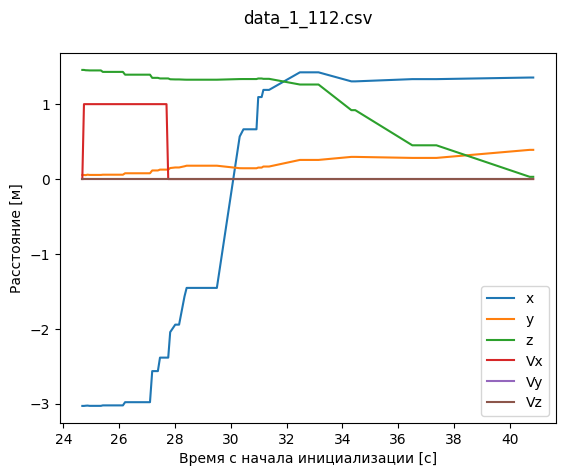

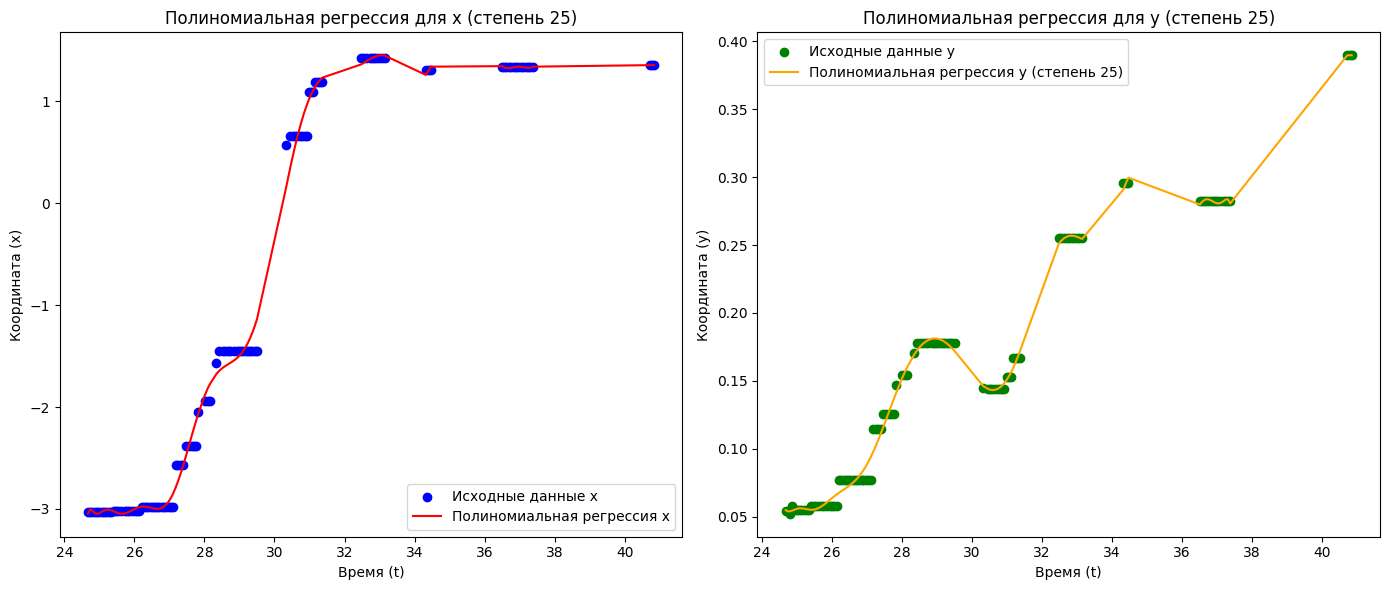

<Figure size 640x480 with 0 Axes>

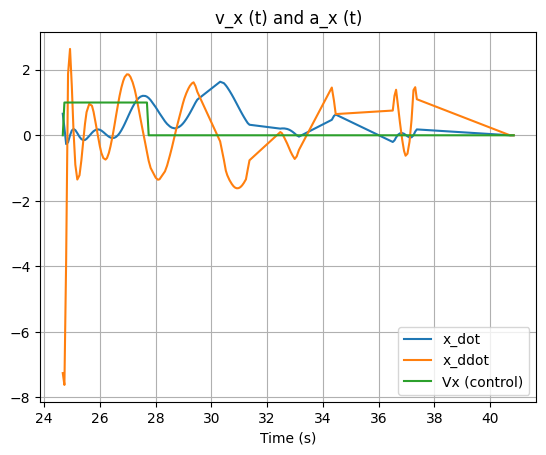

Среднее ускорение = -0.0621, 
 медианное - -0.0275


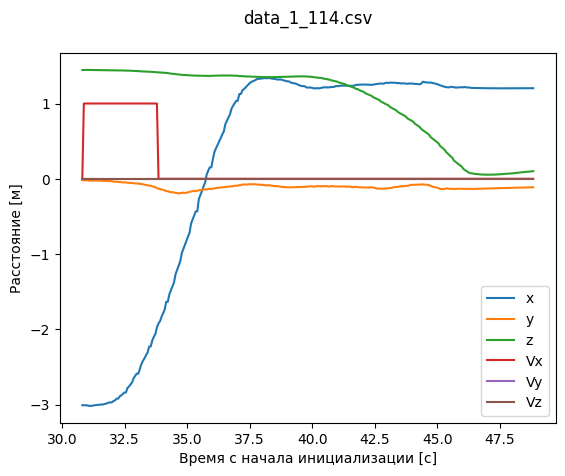

C:\Users\mixai\Documents\code\Danalysis\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63644e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mixai\Documents\code\Danalysis\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.63644e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


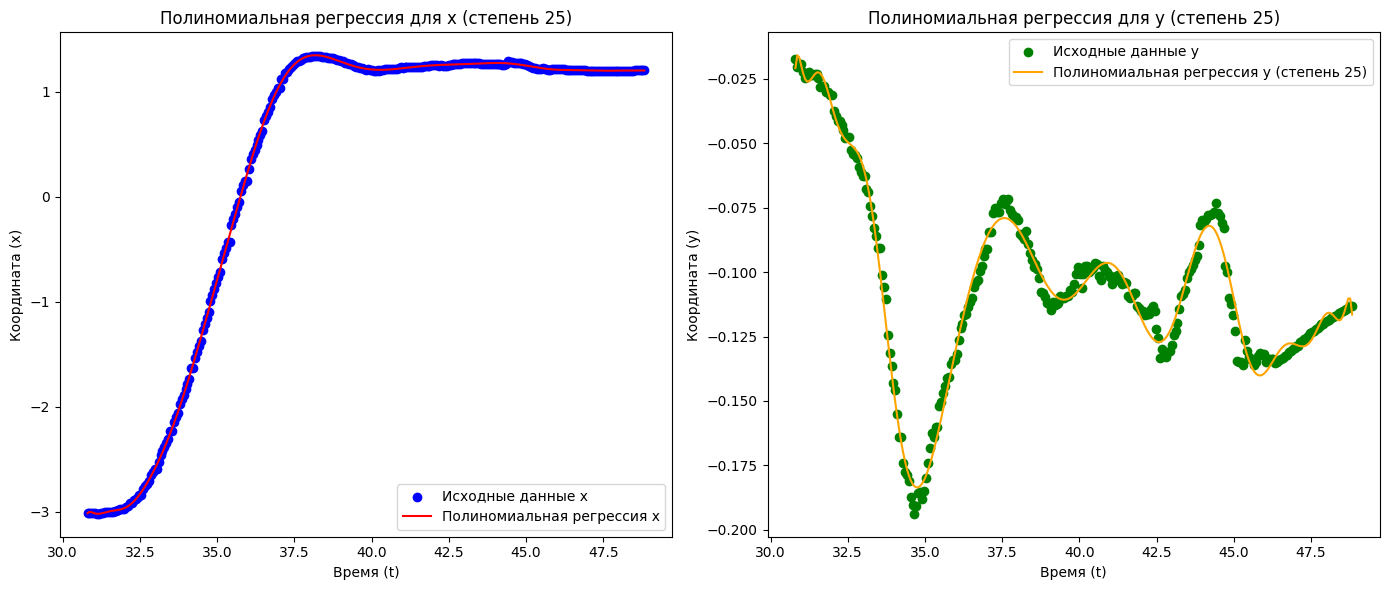

<Figure size 640x480 with 0 Axes>

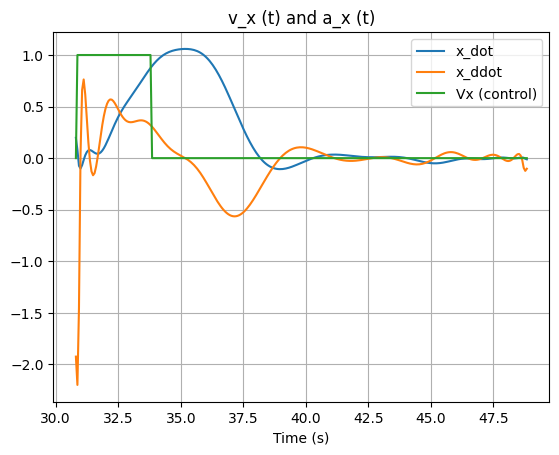

Среднее ускорение = -0.0152, 
 медианное - 0.0014


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
from os.path import isdir
import shutil
path = './data/'
files = os.listdir(path)
for file in files:
    path2 = f'./save/{file[:-4]}/'
    if not isdir(path2):
        from os import makedirs
        makedirs(path2, exist_ok=True)
    df = pd.read_csv(f'{path}{file}', index_col=0)
    shutil.move(f'{path}{file}', f'{path2}{file}')
    title = f"{file}\n"
    df = df[1:]
    
    ### График 1
    df.plot(x = 't', title=title)
    plt.xlabel('Время с начала инициализации [с]')
    plt.ylabel('Расстояние [м]')
    plt.savefig(f'{path2}xyz_vx_vy_vz_{file}.png')
    plt.show()
    ### График 2
    array = df.to_numpy()
    tu = array[:, 6]
    x = array[:, 0]
    y = array[:, 1]
    
    t = tu.reshape(-1, 1)
    # Здесь потом нужно сделать алгоритм для поиска лучшей степени полинома
    best_degree_x = 25
    best_degree_y = 25
    # Нормализуем время t
    scaler = StandardScaler()
    t_scaled = scaler.fit_transform(t)
    # Теперь применим полиномиальную регрессию
    # x
    poly_x = PolynomialFeatures(best_degree_x)
    t_poly_x = poly_x.fit_transform(t_scaled)
    # y
    poly_y = PolynomialFeatures(best_degree_y)
    t_poly_y = poly_y.fit_transform(t_scaled)

    # Используем Ridge для регуляризации
    model_x = Ridge(alpha=1e-6)
    model_y = Ridge(alpha=1e-6)
    
    model_x.fit(t_poly_x, x)
    model_y.fit(t_poly_y, y)

    # Предсказанные значения
    x_pred = model_x.predict(t_poly_x)
    y_pred = model_y.predict(t_poly_y)

    # Визуализация  
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(t, x, color='blue', label='Исходные данные x')
    plt.plot(t, x_pred, color='red', label='Полиномиальная регрессия x')
    plt.title(f'Полиномиальная регрессия для x (степень {best_degree_x})')
    plt.xlabel('Время (t)')
    plt.ylabel('Координата (x)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(t, y, color='green', label='Исходные данные y')
    plt.plot(t, y_pred, color='orange', label=f'Полиномиальная регрессия y (степень {best_degree_y})')
    plt.title(f'Полиномиальная регрессия для y (степень {best_degree_y})')
    plt.xlabel('Время (t)')
    plt.ylabel('Координата (y)')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{path2}reg_{file}.png')
    plt.show()

    
    ### График 3
    # Построение графика
    plt.figure()
    x_dot = np.gradient(x_pred, tu)
    y_dot = np.gradient(y_pred, tu)

    df_dot2 = pd.DataFrame(np.vstack([x_dot, tu]).T, columns=['x_dot', 't'])
    df_dot2.plot(x='t', title=title)

      
    # 
    x_ddot = np.gradient(x_dot, tu)
    y_ddot = np.gradient(y_dot, tu)

    df_ddot_y = pd.DataFrame(np.vstack([y_ddot, array[:, 4], tu]).T, columns=['y_ddot', 'vy' ,'t'])
    # df_ddot_y.plot(x='t', title=title)
    
    df_ddot_x = pd.DataFrame(np.vstack([x_ddot, array[:, 3], tu]).T, columns=['x_ddot', 'vx' ,'t'])
    # df_ddot_x.plot(x='t', title=f"Среднее ускорение = {round(df_ddot_x.iloc[:, 0].mean(), 4)}, \n медианное - {round(df_ddot_x.iloc[:, 0].median(), 4)}")
    
    # Линия для x2
    plt.plot(df_ddot_x['t'], df_ddot_x['x_ddot'], label='x_ddot')
    
    # # Линия для x3
    plt.plot(df['t'], df['Vx'], label='Vx (control)')
    
    # Настройки графика
    plt.xlabel('Time (s)')
    plt.title('v_x (t) and a_x (t)')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{path2}vx_ax_vxc_{file}.png')
    # Отображение графика
    plt.show()
    print(f"Среднее ускорение = {round(df_ddot_x.iloc[:, 0].mean(), 4)}, \n медианное - {round(df_ddot_x.iloc[:, 0].median(), 4)}")


In [7]:
t

array([[30.80601621],
       [30.8669641 ],
       [30.92899799],
       [30.99173689],
       [31.05513167],
       [31.11734605],
       [31.18043208],
       [31.24344563],
       [31.30475903],
       [31.3674221 ],
       [31.4291594 ],
       [31.49205971],
       [31.55289125],
       [31.61506033],
       [31.67735052],
       [31.7396605 ],
       [31.79994369],
       [31.86254835],
       [31.92515206],
       [31.98784447],
       [32.05177045],
       [32.1129396 ],
       [32.1750226 ],
       [32.23695064],
       [32.29836202],
       [32.36054802],
       [32.42306638],
       [32.48550963],
       [32.54858899],
       [32.61055827],
       [32.67334199],
       [32.73670411],
       [32.79600811],
       [32.85784602],
       [32.92071533],
       [32.98196268],
       [33.04629683],
       [33.10649848],
       [33.16946793],
       [33.23104501],
       [33.2920568 ],
       [33.35494947],
       [33.41679382],
       [33.47870231],
       [33.54108906],
       [33

In [12]:
t

array([[30.80601621],
       [30.8669641 ],
       [30.92899799],
       [30.99173689],
       [31.05513167],
       [31.11734605],
       [31.18043208],
       [31.24344563],
       [31.30475903],
       [31.3674221 ],
       [31.4291594 ],
       [31.49205971],
       [31.55289125],
       [31.61506033],
       [31.67735052],
       [31.7396605 ],
       [31.79994369],
       [31.86254835],
       [31.92515206],
       [31.98784447],
       [32.05177045],
       [32.1129396 ],
       [32.1750226 ],
       [32.23695064],
       [32.29836202],
       [32.36054802],
       [32.42306638],
       [32.48550963],
       [32.54858899],
       [32.61055827],
       [32.67334199],
       [32.73670411],
       [32.79600811],
       [32.85784602],
       [32.92071533],
       [32.98196268],
       [33.04629683],
       [33.10649848],
       [33.16946793],
       [33.23104501],
       [33.2920568 ],
       [33.35494947],
       [33.41679382],
       [33.47870231],
       [33.54108906],
       [33

In [14]:
t_poly_x

array([[ 1.00000000e+00, -1.72609312e+00,  2.97939746e+00, ...,
        -2.83450417e+05,  4.89261815e+05, -8.44511453e+05],
       [ 1.00000000e+00, -1.71442353e+00,  2.93924804e+00, ...,
        -2.42502783e+05,  4.15752477e+05, -7.12775830e+05],
       [ 1.00000000e+00, -1.70254600e+00,  2.89866290e+00, ...,
        -2.06668213e+05,  3.51862140e+05, -5.99061481e+05],
       ...,
       [ 1.00000000e+00,  1.70217239e+00,  2.89739085e+00, ...,
         2.05627633e+05,  3.50013681e+05,  5.95783625e+05],
       [ 1.00000000e+00,  1.71400637e+00,  2.93781783e+00, ...,
         2.41149251e+05,  4.13331352e+05,  7.08452569e+05],
       [ 1.00000000e+00,  1.72588047e+00,  2.97866340e+00, ...,
         2.82648332e+05,  4.87817237e+05,  8.41914242e+05]])

In [19]:
files[0][:-4]

'data_1_112'

In [24]:
f'{path2}/{file}'


'./data/da/data_1'

In [26]:
path2

'./data/da'

In [32]:
files

['data_1_112.csv', 'data_1_114.csv']

In [33]:
path2

'./save/data_1_112'

In [34]:
path

'./data/'

In [35]:
f'{path2}/{file}'

'./save/data_1_112/data_1_112.csv'

In [36]:
f'{path}{file}'

'./data/data_1_112.csv'